# Load Data and transform

Import COMPAS data from web and save to folder.

In [110]:
import pandas as pd
import seaborn as sns
import numpy as np

In [111]:
#url = 'https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv'
#df2 = pd.read_csv(url)
#df2.to_csv("../Data/COMPAS_dataset.csv")

Read COMPAS data from folder. 

In [112]:
pathCompas="Data/COMPAS_dataset.csv"
data=pd.read_csv(pathCompas)

Select columns for XGBoost model.

In [113]:
cols=['is_recid','sex','age','race', 'juv_fel_count',
      'juv_misd_count','juv_other_count','priors_count',"c_charge_desc","c_charge_degree"]

data=data[cols]

Make "sex" columns as binary 

In [114]:
data.loc[data.sex=="Female","sex"]=0
data.loc[data.sex=="Male","sex"]=1

Convert categorical columns to dummy variables.

In [115]:
just_dummies=pd.get_dummies(data[["race","c_charge_desc","c_charge_degree"]])
data = pd.concat([data, just_dummies], axis=1) 
data=data.drop(["c_charge_desc","c_charge_degree"] ,axis=1)

Save one-hot-encoded dataset to folder

In [116]:
data.to_csv("Data/COMPAS_dataset_OHE.csv")

Create a version of dataset with standardized data and save to folder. 

In [117]:
from sklearn import preprocessing

X_col_names_to_std=['age','juv_fel_count','juv_misd_count','juv_other_count','priors_count']

data[X_col_names_to_std] = pd.DataFrame(preprocessing.scale(data[X_col_names_to_std]),columns=X_col_names_to_std)

data.to_csv("Data/COMPAS_dataset_OHE_std.csv")


# Building XGBoost model

In [118]:
#!/usr/bin/env python
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import xgboost as xgb
import os
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import KFold
#from utils_copy import *


In [120]:
procted_col_name="sex"
target_name = "is_recid"
y_col_name=target_name

In [121]:
path="Data/COMPAS_dataset_OHE_std.csv"
df=pd.read_csv(path)

In [36]:
titel_mitigation="Dummy"
PATH_orig="Xgboost/models/"+titel_mitigation+"/"

PATH=PATH_orig
print(PATH)

#Make dir to files
if not os.path.exists(PATH):
    os.makedirs(PATH)
    print("Created new path!: ",PATH)



Xgboost/models/Dummy/


Explicitly choosing X columns to build model on.

In [123]:
X_col_names=['sex',
'age',
'juv_fel_count',
'juv_misd_count',
'juv_other_count',
'priors_count',
'race_African-American',
'race_Asian',
'race_Caucasian',
'race_Hispanic',
'race_Native American',
'race_Other',
'c_charge_desc_Abuse Without Great Harm',
'c_charge_desc_Accessory After the Fact',
'c_charge_desc_Agg Abuse Elderlly/Disabled Adult',
'c_charge_desc_Agg Assault Law Enforc Officer',
'c_charge_desc_Agg Assault W/int Com Fel Dome',
'c_charge_desc_Agg Battery Grt/Bod/Harm',
'c_charge_desc_Agg Fleeing and Eluding',
'c_charge_desc_Agg Fleeing/Eluding High Speed',
'c_charge_desc_Aggr Child Abuse-Torture,Punish',
'c_charge_desc_Aggrav Battery w/Deadly Weapon',
'c_charge_desc_Aggrav Child Abuse-Agg Battery',
'c_charge_desc_Aggrav Child Abuse-Causes Harm',
'c_charge_desc_Aggrav Stalking After Injunctn',
'c_charge_desc_Aggravated Assault',
'c_charge_desc_Aggravated Assault W/Dead Weap',
'c_charge_desc_Aggravated Assault W/dead Weap',
'c_charge_desc_Aggravated Assault W/o Firearm',
'c_charge_desc_Aggravated Assault w/Firearm',
'c_charge_desc_Aggravated Battery',
'c_charge_desc_Aggravated Battery (Firearm)',
'c_charge_desc_Aggravated Battery (Firearm/Actual Possession)',
'c_charge_desc_Aggravated Battery / Pregnant',
'c_charge_desc_Aggravated Battery On 65/Older',
'c_charge_desc_Aggress/Panhandle/Beg/Solict',
'c_charge_desc_Aide/Abet Prostitution Lewdness',
'c_charge_desc_Aiding Escape',
'c_charge_desc_Alcoholic Beverage Violation-FL',
'c_charge_desc_Armed Trafficking in Cannabis',
'c_charge_desc_Arson II (Vehicle)',
'c_charge_desc_Arson in the First Degree',
'c_charge_desc_Assault',
'c_charge_desc_Assault Law Enforcement Officer',
'c_charge_desc_Att Burgl Conv Occp',
'c_charge_desc_Att Burgl Struc/Conv Dwel/Occp',
'c_charge_desc_Att Burgl Unoccupied Dwel',
'c_charge_desc_Att Tamper w/Physical Evidence',
'c_charge_desc_Attempt Armed Burglary Dwell',
'c_charge_desc_Attempt Burglary (Struct)',
'c_charge_desc_Attempted Burg/Convey/Unocc',
'c_charge_desc_Attempted Burg/struct/unocc',
'c_charge_desc_Attempted Deliv Control Subst',
'c_charge_desc_Attempted Robbery  No Weapon',
'c_charge_desc_Attempted Robbery  Weapon',
'c_charge_desc_Attempted Robbery Firearm',
'c_charge_desc_Battery',
'c_charge_desc_Battery Emergency Care Provide',
'c_charge_desc_Battery On A Person Over 65',
'c_charge_desc_Battery On Fire Fighter',
'c_charge_desc_Battery On Parking Enfor Speci',
'c_charge_desc_Battery Spouse Or Girlfriend',
'c_charge_desc_Battery on Law Enforc Officer',
'c_charge_desc_Battery on a Person Over 65',
'c_charge_desc_Bribery Athletic Contests',
'c_charge_desc_Burgl Dwel/Struct/Convey Armed',
'c_charge_desc_Burglary Assault/Battery Armed',
'c_charge_desc_Burglary Conveyance Armed',
'c_charge_desc_Burglary Conveyance Assault/Bat',
'c_charge_desc_Burglary Conveyance Occupied',
'c_charge_desc_Burglary Conveyance Unoccup',
'c_charge_desc_Burglary Dwelling Armed',
'c_charge_desc_Burglary Dwelling Assault/Batt',
'c_charge_desc_Burglary Dwelling Occupied',
'c_charge_desc_Burglary Structure Assault/Batt',
'c_charge_desc_Burglary Structure Occupied',
'c_charge_desc_Burglary Structure Unoccup',
'c_charge_desc_Burglary Unoccupied Dwelling',
'c_charge_desc_Burglary With Assault/battery',
'c_charge_desc_Carjacking w/o Deadly Weapon',
'c_charge_desc_Carjacking with a Firearm',
'c_charge_desc_Carry Open/Uncov Bev In Pub',
'c_charge_desc_Carrying A Concealed Weapon',
'c_charge_desc_Carrying Concealed Firearm',
'c_charge_desc_Cash Item w/Intent to Defraud',
'c_charge_desc_Cause Anoth Phone Ring Repeat',
'c_charge_desc_Child Abuse',
'c_charge_desc_Compulsory Attendance Violation',
'c_charge_desc_Compulsory Sch Attnd Violation',
'c_charge_desc_Computer Pornography',
#'c_charge_desc_Consp Traff Oxycodone  4g><14g',
#'c_charge_desc_Consp Traff Oxycodone 28g><30k',
'c_charge_desc_Conspiracy Dealing Stolen Prop',
'c_charge_desc_Conspiracy to Deliver Cocaine',
'c_charge_desc_Consume Alcoholic Bev Pub',
'c_charge_desc_Contradict Statement',
'c_charge_desc_Contribute Delinquency Of A Minor',
'c_charge_desc_Corrupt Public Servant',
'c_charge_desc_Counterfeit Lic Plates/Sticker',
'c_charge_desc_Crim Attempt/Solic/Consp',
'c_charge_desc_Crim Attempt/Solicit/Consp',
'c_charge_desc_Crim Use Of Personal Id Info',
'c_charge_desc_Crim Use of Personal ID Info',
'c_charge_desc_Crimin Mischief Damage $1000+',
'c_charge_desc_Criminal Attempt 3rd Deg Felon',
'c_charge_desc_Criminal Mischief',
#'c_charge_desc_Criminal Mischief Damage <$200',
#'c_charge_desc_Criminal Mischief>$200<$1000',
'c_charge_desc_Crlty Twrd Child Urge Oth Act',
'c_charge_desc_Cruelty Toward Child',
'c_charge_desc_Cruelty to Animals',
'c_charge_desc_Culpable Negligence',
'c_charge_desc_D.U.I. Serious Bodily Injury',
'c_charge_desc_DOC/Cause Public Danger',
'c_charge_desc_DUI - Enhanced',
'c_charge_desc_DUI - Property Damage/Personal Injury',
'c_charge_desc_DUI Blood Alcohol Above 0.20',
'c_charge_desc_DUI Level 0.15 Or Minor In Veh',
'c_charge_desc_DUI Property Damage/Injury',
'c_charge_desc_DUI- Enhanced',
'c_charge_desc_DUI/Property Damage/Persnl Inj',
'c_charge_desc_DWI w/Inj Susp Lic / Habit Off',
'c_charge_desc_DWLS Canceled Disqul 1st Off',
'c_charge_desc_DWLS Susp/Cancel Revoked',
'c_charge_desc_Dealing In Stolen Property',
'c_charge_desc_Dealing in Stolen Property',
'c_charge_desc_Defrauding Innkeeper',
'c_charge_desc_Defrauding Innkeeper $300/More',
'c_charge_desc_Del 3,4 Methylenedioxymethcath',
'c_charge_desc_Del Cannabis At/Near Park',
'c_charge_desc_Del Cannabis For Consideration',
'c_charge_desc_Del Morphine at/near Park',
'c_charge_desc_Del of JWH-250 2-Methox 1-Pentyl',
'c_charge_desc_Deliver 3,4 Methylenediox',
'c_charge_desc_Deliver Alprazolam',
'c_charge_desc_Deliver Cannabis',
'c_charge_desc_Deliver Cannabis 1000FTSch',
'c_charge_desc_Deliver Cocaine',
'c_charge_desc_Deliver Cocaine 1000FT Church',
'c_charge_desc_Deliver Cocaine 1000FT Park',
'c_charge_desc_Deliver Cocaine 1000FT School',
'c_charge_desc_Deliver Cocaine 1000FT Store',
'c_charge_desc_Delivery Of Drug Paraphernalia',
'c_charge_desc_Delivery of 5-Fluoro PB-22',
'c_charge_desc_Delivery of Heroin',
'c_charge_desc_Depriv LEO of Protect/Communic',
'c_charge_desc_Discharge Firearm From Vehicle',
'c_charge_desc_Disorderly Conduct',
'c_charge_desc_Disorderly Intoxication',
'c_charge_desc_Disrupting School Function',
'c_charge_desc_Drivg While Lic Suspd/Revk/Can',
'c_charge_desc_Driving License Suspended',
'c_charge_desc_Driving Under The Influence',
'c_charge_desc_Driving While License Revoked',
'c_charge_desc_Escape',
'c_charge_desc_Exhibition Weapon School Prop',
'c_charge_desc_Expired DL More Than 6 Months',
'c_charge_desc_Exploit Elderly Person 20-100K',
'c_charge_desc_Exposes Culpable Negligence',
'c_charge_desc_Extradition/Defendants',
'c_charge_desc_Fabricating Physical Evidence',
'c_charge_desc_Fail Obey Driv Lic Restrictions',
'c_charge_desc_Fail Register Career Offender',
'c_charge_desc_Fail Register Vehicle',
'c_charge_desc_Fail Sex Offend Report Bylaw',
'c_charge_desc_Fail To Obey Police Officer',
'c_charge_desc_Fail To Redeliv Hire/Leas Prop',
'c_charge_desc_Fail To Redeliver Hire Prop',
'c_charge_desc_Fail To Secure Load',
'c_charge_desc_Failure To Pay Taxi Cab Charge',
'c_charge_desc_Failure To Return Hired Vehicle',
'c_charge_desc_False 911 Call',
'c_charge_desc_False Bomb Report',
'c_charge_desc_False Imprisonment',
'c_charge_desc_False Info LEO During Invest',
'c_charge_desc_False Motor Veh Insurance Card',
'c_charge_desc_False Name By Person Arrest',
'c_charge_desc_False Ownership Info/Pawn Item',
'c_charge_desc_Falsely Impersonating Officer',
'c_charge_desc_Fel Drive License Perm Revoke',
'c_charge_desc_Felon in Pos of Firearm or Amm',
'c_charge_desc_Felony Batt(Great Bodily Harm)',
'c_charge_desc_Felony Battery',
'c_charge_desc_Felony Battery (Dom Strang)',
'c_charge_desc_Felony Battery w/Prior Convict',
'c_charge_desc_Felony Committing Prostitution',
'c_charge_desc_Felony DUI (level 3)',
'c_charge_desc_Felony DUI - Enhanced',
'c_charge_desc_Felony Driving While Lic Suspd',
'c_charge_desc_Felony Petit Theft',
'c_charge_desc_Felony/Driving Under Influence',
'c_charge_desc_Fighting/Baiting Animals',
'c_charge_desc_Flee/Elude LEO-Agg Flee Unsafe',
'c_charge_desc_Fleeing Or Attmp Eluding A Leo',
'c_charge_desc_Fleeing or Eluding a LEO',
'c_charge_desc_Forging Bank Bills/Promis Note',
'c_charge_desc_Fraud Obtain Food or Lodging',
'c_charge_desc_Fraudulent Use of Credit Card',
'c_charge_desc_Gambling/Gamb Paraphernalia',
'c_charge_desc_Giving False Crime Report',
'c_charge_desc_Grand Theft (Motor Vehicle)',
'c_charge_desc_Grand Theft (motor Vehicle)',
'c_charge_desc_Grand Theft Dwell Property',
'c_charge_desc_Grand Theft Firearm',
'c_charge_desc_Grand Theft In The 3Rd Degree',
'c_charge_desc_Grand Theft in the 1st Degree',
'c_charge_desc_Grand Theft in the 3rd Degree',
'c_charge_desc_Grand Theft of a Fire Extinquisher',
'c_charge_desc_Grand Theft of the 2nd Degree',
'c_charge_desc_Grand Theft on 65 Yr or Older',
'c_charge_desc_Harass Witness/Victm/Informnt',
'c_charge_desc_Harm Public Servant Or Family',
'c_charge_desc_Hiring with Intent to Defraud',
'c_charge_desc_Imperson Public Officer or Emplyee',
'c_charge_desc_Insurance Fraud',
'c_charge_desc_Interfere W/Traf Cont Dev RR',
'c_charge_desc_Interference with Custody',
'c_charge_desc_Intoxicated/Safety Of Another',
'c_charge_desc_Introduce Contraband Into Jail',
'c_charge_desc_Issuing a Worthless Draft',
'c_charge_desc_Kidnapping / Domestic Violence',
'c_charge_desc_Lease For Purpose Trafficking',
'c_charge_desc_Leave Acc/Attend Veh/More $50',
'c_charge_desc_Leave Accd/Attend Veh/Less $50',
'c_charge_desc_Leaving Acc/Unattended Veh',
'c_charge_desc_Leaving the Scene of Accident',
'c_charge_desc_Lewd Act Presence Child 16-',
'c_charge_desc_Lewd or Lascivious Molestation',
#'c_charge_desc_Lewd/Lasc Battery Pers 12+/<16',
#'c_charge_desc_Lewd/Lasc Exhib Presence <16yr',
'c_charge_desc_Lewd/Lasciv Molest Elder Persn',
'c_charge_desc_Lewdness Violation',
'c_charge_desc_License Suspended Revoked',
'c_charge_desc_Littering',
'c_charge_desc_Live on Earnings of Prostitute',
'c_charge_desc_Lve/Scen/Acc/Veh/Prop/Damage',
'c_charge_desc_Manage Busn W/O City Occup Lic',
'c_charge_desc_Manslaughter W/Weapon/Firearm',
'c_charge_desc_Manufacture Cannabis',
'c_charge_desc_Misuse Of 911 Or E911 System',
'c_charge_desc_Money Launder 100K or More Dols',
'c_charge_desc_Murder In 2nd Degree W/firearm',
'c_charge_desc_Murder in 2nd Degree',
'c_charge_desc_Murder in the First Degree',
'c_charge_desc_Neglect Child / Bodily Harm',
'c_charge_desc_Neglect Child / No Bodily Harm',
'c_charge_desc_Neglect/Abuse Elderly Person',
'c_charge_desc_Obstruct Fire Equipment',
'c_charge_desc_Obstruct Officer W/Violence',
'c_charge_desc_Obtain Control Substance By Fraud',
'c_charge_desc_Offer Agree Secure For Lewd Act',
'c_charge_desc_Offer Agree Secure/Lewd Act',
'c_charge_desc_Offn Against Intellectual Prop',
'c_charge_desc_Open Carrying Of Weapon',
'c_charge_desc_Oper Motorcycle W/O Valid DL',
'c_charge_desc_Operating W/O Valid License',
'c_charge_desc_Opert With Susp DL 2ND Offense',
'c_charge_desc_Opert With Susp DL 2nd Offens',
'c_charge_desc_PL/Unlaw Use Credit Card',
'c_charge_desc_Petit Theft',
'c_charge_desc_Petit Theft $100- $300',
'c_charge_desc_Pos Cannabis For Consideration',
'c_charge_desc_Pos Cannabis W/Intent Sel/Del',
'c_charge_desc_Pos Methylenedioxymethcath W/I/D/S',
'c_charge_desc_Poss 3,4 MDMA (Ecstasy)',
'c_charge_desc_Poss Alprazolam W/int Sell/Del',
'c_charge_desc_Poss Anti-Shoplifting Device',
'c_charge_desc_Poss Cntrft Contr Sub w/Intent',
'c_charge_desc_Poss Cocaine/Intent To Del/Sel',
'c_charge_desc_Poss Contr Subst W/o Prescript',
'c_charge_desc_Poss Counterfeit Payment Inst',
'c_charge_desc_Poss Drugs W/O A Prescription',
'c_charge_desc_Poss F/Arm Delinq',
'c_charge_desc_Poss Firearm W/Altered ID#',
'c_charge_desc_Poss Meth/Diox/Meth/Amp (MDMA)',
'c_charge_desc_Poss Of 1,4-Butanediol',
'c_charge_desc_Poss Of Controlled Substance',
'c_charge_desc_Poss Of RX Without RX',
'c_charge_desc_Poss Oxycodone W/Int/Sell/Del',
'c_charge_desc_Poss Pyrrolidinobutiophenone',
'c_charge_desc_Poss Pyrrolidinovalerophenone',
'c_charge_desc_Poss Pyrrolidinovalerophenone W/I/D/S',
'c_charge_desc_Poss Similitude of Drivers Lic',
'c_charge_desc_Poss Tetrahydrocannabinols',
'c_charge_desc_Poss Trifluoromethylphenylpipe',
'c_charge_desc_Poss Unlaw Issue Driver Licenc',
'c_charge_desc_Poss Unlaw Issue Id',
'c_charge_desc_Poss Wep Conv Felon',
'c_charge_desc_Poss of Cocaine W/I/D/S 1000FT Park',
'c_charge_desc_Poss of Firearm by Convic Felo',
'c_charge_desc_Poss of Methylethcathinone',
'c_charge_desc_Poss of Vessel w/Altered ID NO',
'c_charge_desc_Poss/Sell/Del Cocaine 1000FT Sch',
'c_charge_desc_Poss/Sell/Del/Man Amobarbital',
'c_charge_desc_Poss/Sell/Deliver Clonazepam',
'c_charge_desc_Poss/pur/sell/deliver Cocaine',
'c_charge_desc_Poss3,4 Methylenedioxymethcath',
'c_charge_desc_Posses/Disply Susp/Revk/Frd DL',
'c_charge_desc_Possess Cannabis 1000FTSch',
'c_charge_desc_Possess Cannabis/20 Grams Or Less',
'c_charge_desc_Possess Controlled Substance',
'c_charge_desc_Possess Countrfeit Credit Card',
'c_charge_desc_Possess Drug Paraphernalia',
'c_charge_desc_Possess Mot Veh W/Alt Vin #',
'c_charge_desc_Possess Tobacco Product Under 18',
'c_charge_desc_Possess Weapon On School Prop',
'c_charge_desc_Possess w/I/Utter Forged Bills',
'c_charge_desc_Possess/Use Weapon 1 Deg Felon',
'c_charge_desc_Possession Burglary Tools',
'c_charge_desc_Possession Child Pornography',
'c_charge_desc_Possession Firearm School Prop',
'c_charge_desc_Possession Of 3,4Methylenediox',
'c_charge_desc_Possession Of Alprazolam',
'c_charge_desc_Possession Of Amphetamine',
'c_charge_desc_Possession Of Anabolic Steroid',
'c_charge_desc_Possession Of Buprenorphine',
'c_charge_desc_Possession Of Carisoprodol',
'c_charge_desc_Possession Of Clonazepam',
'c_charge_desc_Possession Of Cocaine',
'c_charge_desc_Possession Of Diazepam',
'c_charge_desc_Possession Of Fentanyl',
'c_charge_desc_Possession Of Heroin',
'c_charge_desc_Possession Of Lorazepam',
'c_charge_desc_Possession Of Methamphetamine',
'c_charge_desc_Possession Of Paraphernalia',
'c_charge_desc_Possession Of Phentermine',
'c_charge_desc_Possession of Alcohol Under 21',
'c_charge_desc_Possession of Benzylpiperazine',
'c_charge_desc_Possession of Butylone',
'c_charge_desc_Possession of Cannabis',
'c_charge_desc_Possession of Cocaine',
'c_charge_desc_Possession of Codeine',
'c_charge_desc_Possession of Ethylone',
'c_charge_desc_Possession of Hydrocodone',
'c_charge_desc_Possession of Hydromorphone',
'c_charge_desc_Possession of LSD',
'c_charge_desc_Possession of Methadone',
'c_charge_desc_Possession of Morphine',
'c_charge_desc_Possession of Oxycodone',
'c_charge_desc_Possession of XLR11',
'c_charge_desc_Present Proof of Invalid Insur',
'c_charge_desc_Principal In The First Degree',
'c_charge_desc_Prostitution',
'c_charge_desc_Prostitution/Lewd Act Assignation',
'c_charge_desc_Prostitution/Lewdness/Assign',
'c_charge_desc_Prowling/Loitering',
'c_charge_desc_Purchase Cannabis',
'c_charge_desc_Purchase Of Cocaine',
'c_charge_desc_Purchase/P/W/Int Cannabis',
'c_charge_desc_Purchasing Of Alprazolam',
'c_charge_desc_Reckless Driving',
'c_charge_desc_Refuse Submit Blood/Breath Test',
'c_charge_desc_Refuse to Supply DNA Sample',
'c_charge_desc_Resist Officer w/Violence',
'c_charge_desc_Resist/Obstruct W/O Violence',
'c_charge_desc_Restraining Order Dating Viol',
'c_charge_desc_Retail Theft $300 1st Offense',
'c_charge_desc_Retail Theft $300 2nd Offense',
'c_charge_desc_Ride Tri-Rail Without Paying',
'c_charge_desc_Robbery / No Weapon',
'c_charge_desc_Robbery / Weapon',
'c_charge_desc_Robbery Sudd Snatch No Weapon',
'c_charge_desc_Robbery W/Deadly Weapon',
'c_charge_desc_Robbery W/Firearm',
'c_charge_desc_Sale/Del Cannabis At/Near Scho',
'c_charge_desc_Sale/Del Counterfeit Cont Subs',
'c_charge_desc_Sel Etc/Pos/w/Int Contrft Schd',
'c_charge_desc_Sel/Pur/Mfr/Del Control Substa',
'c_charge_desc_Sell Cannabis',
'c_charge_desc_Sell Conterfeit Cont Substance',
'c_charge_desc_Sell or Offer for Sale Counterfeit Goods',
'c_charge_desc_Sell/Man/Del Pos/w/int Heroin',
'c_charge_desc_Sex Batt Faml/Cust Vict 12-17Y',
'c_charge_desc_Sex Battery Deft 18+/Vict 11-',
'c_charge_desc_Sex Offender Fail Comply W/Law',
'c_charge_desc_Sexual Battery / Vict 12 Yrs +',
'c_charge_desc_Sexual Performance by a Child',
'c_charge_desc_Shoot In Occupied Dwell',
'c_charge_desc_Shoot Into Vehicle',
'c_charge_desc_Simulation of Legal Process',
'c_charge_desc_Solic to Commit Battery',
'c_charge_desc_Solicit Deliver Cocaine',
'c_charge_desc_Solicit Purchase Cocaine',
'c_charge_desc_Solicit To Deliver Cocaine',
'c_charge_desc_Solicitation On Felony 3 Deg',
'c_charge_desc_Soliciting For Prostitution',
'c_charge_desc_Sound Articles Over 100',
'c_charge_desc_Stalking',
'c_charge_desc_Stalking (Aggravated)',
'c_charge_desc_Strong Armed  Robbery',
'c_charge_desc_Structuring Transactions',
'c_charge_desc_Susp Drivers Lic 1st Offense',
'c_charge_desc_Tamper With Victim',
'c_charge_desc_Tamper With Witness',
'c_charge_desc_Tamper With Witness/Victim/CI',
'c_charge_desc_Tampering With Physical Evidence',
'c_charge_desc_Tampering with a Victim',
'c_charge_desc_Theft',
'c_charge_desc_Theft/To Deprive',
'c_charge_desc_Threat Public Servant',
'c_charge_desc_Throw Deadly Missile Into Veh',
'c_charge_desc_Throw In Occupied Dwell',
'c_charge_desc_Throw Missile Into Pub/Priv Dw',
#'c_charge_desc_Traff In Cocaine <400g>150 Kil',
'c_charge_desc_Traffic Counterfeit Cred Cards',
#'c_charge_desc_Traffick Amphetamine 28g><200g',
#'c_charge_desc_Traffick Hydrocodone   4g><14g',
#'c_charge_desc_Traffick Oxycodone     4g><14g',
'c_charge_desc_Trans/Harm/Material to a Minor',
'c_charge_desc_Trespass On School Grounds',
'c_charge_desc_Trespass Other Struct/Conve',
'c_charge_desc_Trespass Private Property',
'c_charge_desc_Trespass Property w/Dang Weap',
'c_charge_desc_Trespass Struct/Convey Occupy',
'c_charge_desc_Trespass Struct/Conveyance',
'c_charge_desc_Trespass Structure w/Dang Weap',
'c_charge_desc_Trespass Structure/Conveyance',
'c_charge_desc_Trespassing/Construction Site',
'c_charge_desc_Tresspass Struct/Conveyance',
'c_charge_desc_Tresspass in Structure or Conveyance',
'c_charge_desc_Unauth C/P/S Sounds>1000/Audio',
'c_charge_desc_Unauth Poss ID Card or DL',
'c_charge_desc_Unauthorized Interf w/Railroad',
'c_charge_desc_Unemployment Compensatn Fraud',
'c_charge_desc_Unl/Disturb Education/Instui',
'c_charge_desc_Unlaw Lic Use/Disply Of Others',
'c_charge_desc_Unlaw LicTag/Sticker Attach',
'c_charge_desc_Unlaw Use False Name/Identity',
'c_charge_desc_Unlawful Conveyance of Fuel',
'c_charge_desc_Unlawful Use Of Police Badges',
'c_charge_desc_Unlicensed Telemarketing',
'c_charge_desc_Use Computer for Child Exploit',
'c_charge_desc_Use Of 2 Way Device To Fac Fel',
'c_charge_desc_Use Scanning Device to Defraud',
'c_charge_desc_Use of Anti-Shoplifting Device',
'c_charge_desc_Uttering Forged Bills',
'c_charge_desc_Uttering Forged Credit Card',
'c_charge_desc_Uttering Worthless Check +$150',
'c_charge_desc_Uttering a Forged Instrument',
#'c_charge_desc_Video Voyeur-<24Y on Child >16',
'c_charge_desc_Viol Injunct Domestic Violence',
'c_charge_desc_Viol Injunction Protect Dom Vi',
'c_charge_desc_Viol Pretrial Release Dom Viol',
'c_charge_desc_Viol Prot Injunc Repeat Viol',
'c_charge_desc_Violation License Restrictions',
'c_charge_desc_Violation Of Boater Safety Id',
'c_charge_desc_Violation of Injunction Order/Stalking/Cyberstalking',
'c_charge_desc_Voyeurism',
'c_charge_desc_arrest case no charge',
'c_charge_degree_F',
'c_charge_degree_M']
#X_col_names = [col for col in X_col_names if col not in leave_out ]

Build and train 50 XGBoost models.

In [124]:
modelcounter=0
df_test=pd.DataFrame([],columns=list(X_col_names)+["is_recid"]+["output"]+["output_prob"])

df_copy=df

for new_seed in range(1,11):
    df = df_copy.sample(frac=1, random_state=new_seed).reset_index(drop=True)
    X = df[X_col_names]
    y = df[target_name].to_frame()
    
    neg, pos = np.bincount(y[target_name])
    scale_pos_weight = neg / pos

    params = {"n_estimators": 400,
            "objective": "binary:logistic",
            "scale_pos_weight": scale_pos_weight,
            "use_label_encoder": False,
            "learning_rate": 0.1,
            "eval_metric": "logloss",
            "seed": 0
    }
    
    
    model = xgb.XGBClassifier(**params)
    #skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=new_seed)
    skf=KFold(n_splits=5, random_state=new_seed, shuffle=True)

    
    y_valid_pred = 0*y[target_name]
    valid_acc, valid_pre, valid_recall, valid_roc_auc = list(), list(), list(), list()
    #for train_index, valid_index in skf.split(X_train, y_train):
    for train_index, valid_index in skf.split(X):
        print(f"Running model {modelcounter}")

        X_train_split, X_valid_split = X.iloc[train_index,:], X.iloc[valid_index,:]
        y_train_split, y_valid_split = y.iloc[train_index], y.iloc[valid_index]
        
        optimize_rounds = True
        early_stopping_rounds = 50
        if optimize_rounds:
            eval_set=[(X_valid_split, y_valid_split)]
            fit_model = model.fit(X_train_split, y_train_split, 
                                    eval_set=eval_set,
                                   # eval_metric=metrics.gini_xgb,
                                    early_stopping_rounds=early_stopping_rounds,
                                    verbose=False)

        else:
            fit_model = model.fit(X_train_split, y_train_split)

        pred = fit_model.predict_proba(X_valid_split)[:,1]
        y_valid_pred.iloc[valid_index] = pred

        y_valid_scores = (y_valid_pred.iloc[valid_index] > 0.5)


        #### SAVE DATA####
        y_true_pd=y_valid_split.reset_index(drop=True)
        y_pred_pd=y_valid_scores.apply(lambda x: 1 if x==True else 0).to_frame().reset_index(drop=True).rename(columns={"is_recid":"output"})
        y_pred_prob_pd=pd.DataFrame(pred, columns = ["output_prob"])

        df_subset=pd.concat([X_valid_split.reset_index(drop=True),y_true_pd,y_pred_pd,y_pred_prob_pd],axis=1)
        
        df_subset["Model"]="Model"+str(modelcounter)
        
        df_subset.to_csv(PATH+"model"+str(modelcounter)+"_test_data.csv")

        df_test=df_test.append(df_subset, ignore_index=True,sort=True)
       ###################


        valid_acc.append(accuracy_score(y_valid_split, y_valid_scores))
        valid_pre.append(precision_score(y_valid_split, y_valid_scores))
        valid_recall.append(recall_score(y_valid_split, y_valid_scores))
        valid_roc_auc.append(roc_auc_score(y_valid_split, y_valid_pred.iloc[valid_index]))

        modelcounter=modelcounter+1

print("Saving test data...")        
df_test.to_csv(PATH+"all_test_data.csv")
print("The full test data lies here:",PATH+"all_test_data.csv")

Running model 0
Running model 1
Running model 2
Running model 3
Running model 4
Running model 5
Running model 6
Running model 7
Running model 8
Running model 9
Running model 10
Running model 11
Running model 12
Running model 13
Running model 14
Running model 15
Running model 16
Running model 17
Running model 18
Running model 19
Running model 20
Running model 21
Running model 22
Running model 23
Running model 24
Running model 25
Running model 26
Running model 27
Running model 28
Running model 29
Running model 30
Running model 31
Running model 32
Running model 33
Running model 34
Running model 35
Running model 36
Running model 37
Running model 38
Running model 39
Running model 40
Running model 41
Running model 42
Running model 43
Running model 44
Running model 45
Running model 46
Running model 47
Running model 48
Running model 49
Saving test data...
The full test data lies here: Plot_metrics/dummy/all_test_data.csv


# Create confusion metrics

Class for getting the confusion (classification) metrics.

In [167]:

def get_df_w_metrics(df,protected_variable_name,y_target_name,y_pred_name,y_probs_col=None):
    
    import pandas as pd
    

    #Create empty DataFrame
    confusion_df=pd.DataFrame(columns=[protected_variable_name,"FPR","FNR"])
    


    #For each value of the protected variable, calculated FPR/FNR and insert into the empty DataFrame
    for name in list(df[protected_variable_name].unique()):
        a=df[df[protected_variable_name]==name][y_target_name]
        b=df[df[protected_variable_name]==name][y_pred_name]#.apply(lambda x: 0 if x<t else 1 )

    
        TN, FP, FN, TP = confusion_matrix(list(a), list(b),labels=[0, 1]).ravel()
        
        # Sensitivity, hit rate, recall, or true positive rate
        TPR = TP/(TP+FN)
        # Specificity or true negative rate
        TNR = TN/(TN+FP) 
        # Precision or positive predictive value
        PPV = TP/(TP+FP)
        # Negative predictive value
        NPV = TN/(TN+FN)
        # Fall out or false positive rate
        FPR = FP/(FP+TN)
        # False negative rate
        FNR = FN/(TP+FN)
        # False discovery rate
        FDR = FP/(TP+FP)

        # Overall accuracy
        ACC = (TP+TN)/(TP+FP+FN+TN)

        LRplus=TPR/FPR
        LRminus=FNR/TNR


        #F1-score
        F1=2*(PPV*TPR)/(PPV+TPR)
        
        y_hat_mean=b.mean()
        y_target_mean=a.mean()
        
        
        if y_probs_col is not None:
            y_hat_prob=df[df[protected_variable_name]==name][y_probs_col].mean()
        

        confusion_df=confusion_df.append({protected_variable_name:name,
                                          "TPR":TPR,
                                          "TNR":TNR,
                                          "FPR":FPR,
                                          "FNR":FNR,
                                          "PPV":PPV,
                                          "NPV":NPV,
                                          "FDR":FDR,
                                          "ACC":ACC,
                                          "F1":F1,
                                          "LRplus":LRplus,
                                          "LRminus":LRminus,
                                          "TN":TN,
                                          "FP":FP,
                                          "FN":FN,
                                          "TP":TP,
                                          "Mean_y_hat":y_hat_mean,
                                          "Mean_y_target":y_target_mean,
                                          "Mean_y_hat_prob":y_hat_prob
                                          
                                          
                                          },ignore_index=True)

    return confusion_df

Create and save classification metrics.

In [168]:
procted_col_name="sex"
output_col_name="output"
output_prob_col_name="output_prob"


metrics_frame_gender=pd.DataFrame([],columns=["sex","TPR","FPR","TNR","FNR","ACC","Mean_y_hat","Mean_y_target","Mean_y_hat_prob"])

for modelnr in df_test["Model"].unique():

    metrics_frame_sub_gender=get_df_w_metrics(df_test[df_test["Model"]==modelnr],procted_col_name,y_col_name,output_col_name,output_prob_col_name).sort_values(["sex"])[["sex","TPR","FPR","TNR","FNR","ACC","Mean_y_hat","Mean_y_target","Mean_y_hat_prob"]]#*100
  
    metrics_frame_gender=    pd.concat([metrics_frame_gender,metrics_frame_sub_gender
                        
                       ],sort=False,axis=0)


# In[28]:


metrics_frame_gender_to_plot=metrics_frame_gender.copy()
metrics_frame_gender_to_plot["Model"]="Xgboost"
metrics_frame_gender_to_plot.to_csv(f"Plot_metrics/{titel_mitigation}/Xgboost_gender.csv")


# Plot measures

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import numpy as np
import scipy.stats as st


In [129]:
folder_name="dummy"
PATH=f"Plot_metrics/{folder_name}/"

In [130]:
#Make dir to files
if not os.path.exists(PATH):
    os.makedirs(PATH)
    print("Created new path!: ",PATH)

## read data

In [150]:
#data_gender_FFNN=pd.read_csv(PATH+"FFNN_gender.csv")
data_gender_Xgboost=pd.read_csv(PATH+"Xgboost_gender.csv")
#data_gender_SVM=pd.read_csv(PATH+"SVM_gender.csv")
#data_gender_RF=pd.read_csv(PATH+"RF_gender.csv")
#data_gender_LR=pd.read_csv(PATH+"LR_gender.csv")

In [151]:
data_gender_Xgboost=data_gender_Xgboost.rename(columns={"sex":"Gender"})

In [157]:
all_data_gender=pd.concat([
    #data_gender_FFNN,
    data_gender_Xgboost,
    #data_gender_SVM,
    #data_gender_RF,
    #data_gender_LR
],sort=False,axis=0
).drop(columns=["Unnamed: 0"])
all_data_gender.loc[all_data_gender.Model == "Xgboost", "Model"] = "XGBoost"

Melt data

In [158]:
all_data_gender=all_data_gender.melt(id_vars=["Gender","Model"],var_name="Metric",value_name="Value")

Convert binary gender to string

In [159]:
all_data_gender["Gender_string"]=all_data_gender["Gender"].apply(lambda x: "Female" if x==0 else "Male")

## Create plot

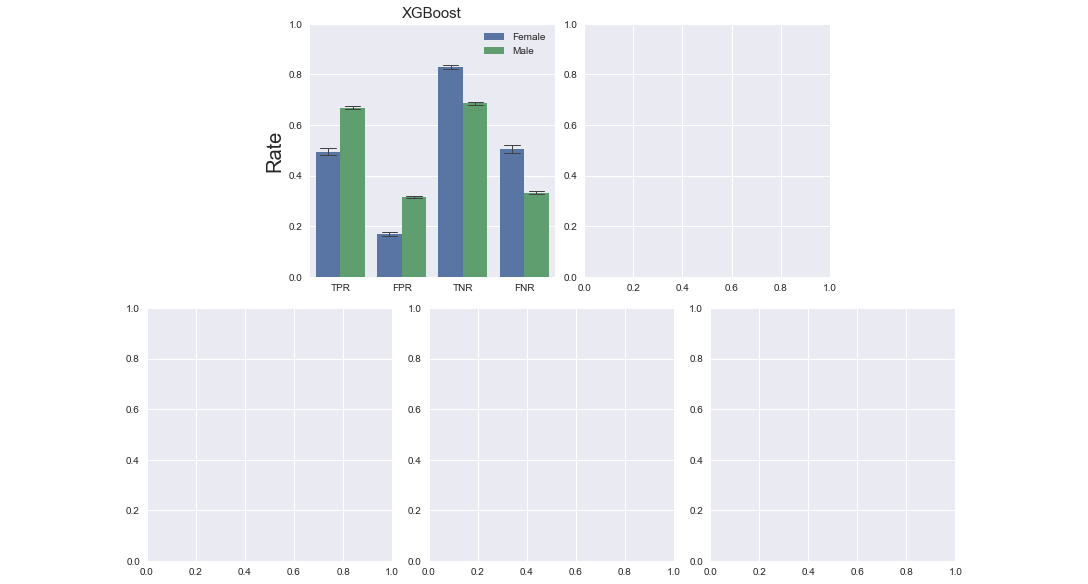

In [175]:
fig = plt.figure(constrained_layout=True,figsize=(15,8))

gs = plt.GridSpec(2, 8, figure=fig)
gs.update(wspace=0.5)

ax=[]

ax.append( fig.add_subplot(gs[0, 2:4]))
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
ax.append( fig.add_subplot(gs[0, 4:6]))
ax.append(fig.add_subplot(gs[1, 1:3]))
ax.append(fig.add_subplot(gs[1, 3:5]))
ax.append( fig.add_subplot(gs[1, 5:7]))


palette_custom ={"Female": "C0", "Male": "C1"}
gender_order=["Female","Male"]
#list_of_models=["SVM","LR","RF","FFNN","XGBoost"]
list_of_models=["XGBoost"] # Only one model in this COMPAS example

for i,v in enumerate(list_of_models):
    
    filter1=all_data_gender["Model"]==v
    filter2=all_data_gender["Metric"]!="Mean_y_hat"
    filter3=all_data_gender["Metric"]!="Mean_y_target"
    filter4=all_data_gender["Metric"]!="Mean_y_hat_prob"
    filter5=all_data_gender["Metric"]!="ACC"
    
    

    
    ax[i].set_title(v,size=15)
    ax[i].set_ylim([0, 1])
    ax[i].grid(axis='x')
    sns.barplot(data=all_data_gender[(filter1&filter2&filter3&filter4&filter5)],x="Metric",y="Value",hue="Gender_string",ax=ax[i],errwidth=1,capsize=0.25,palette=palette_custom,hue_order=gender_order)
    
    ax[i].legend(title="Gender")
    ax[i].legend( loc="upper right")
    if i==0:
        ax[i].set(xlabel='')
        ax[i].set_ylabel("Rate",fontsize=20)
    if i==1:
        ax[i].set(xlabel='',ylabel='')
        ax[i].tick_params( labelleft=False)
    if i==2:
        ax[i].set_ylabel("Rate",fontsize=20)
        ax[i].set_xlabel("",fontsize=20)
        
    if i==3:
        ax[i].set(ylabel='')
        ax[i].set_xlabel("",fontsize=20)
        ax[i].tick_params( labelleft=False)
    if i==4:
        ax[i].set_ylabel('',fontsize=20)
        ax[i].set_xlabel("",fontsize=20)


plt.savefig(f"Plots/{folder_name}/{folder_name}_gender_metrics_allmodels", bbox_inches = 'tight')
plt.show()

## Calculate relation between male/female

In [176]:
frame=all_data_gender[(filter2&filter3&filter4&filter5)]
newFrame=pd.DataFrame([],columns=["Model","Metric","Abs Difference","Relation","Relative difference (%)"])

for i in list(frame["Model"].unique()):
    for j in list(frame["Metric"].unique()) :
        if j not in ["Mean_y_target","Mean_y_hat_prob"]:
            female_val=frame[(frame["Model"]==i)&(frame["Metric"]==j)&(frame["Gender_string"]=="Female")]["Value"].mean()
            male_val=frame[(frame["Model"]==i)&(frame["Metric"]==j)&(frame["Gender_string"]=="Male")]["Value"].mean()

            relation=female_val/male_val

            newFrame=newFrame.append({"Model":i,"Metric":j,"Relation":relation},ignore_index=True)

## Plot relation

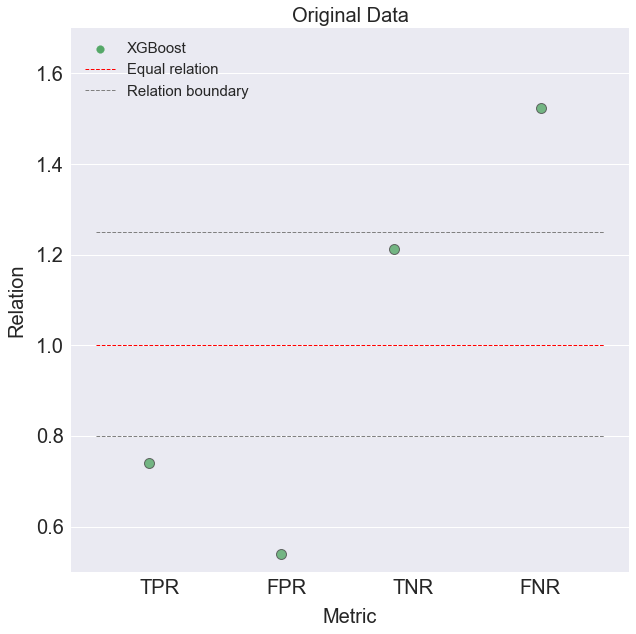

In [178]:
plt.figure(figsize=(10,10)) 

sns.stripplot(data=newFrame,x="Metric",y="Relation",hue="Model",jitter=0.2,size=10,alpha=0.8,linewidth=1,
             palette={"FFNN":"C0","XGBoost":"C1","SVM":"C2","LR":"C3","RF":"C4"}             
             )

plt.hlines(y=1, xmin=-0.5, xmax=3.5, colors='red', linestyles='--', lw=1, label='Equal relation')
plt.hlines(y=0.8, xmin=-0.5, xmax=3.5, colors='grey', linestyles='--', lw=1, label='Relation boundary')
plt.hlines(y=1.25, xmin=-0.5, xmax=3.5, colors='grey', linestyles='--', lw=1)#, label='Relative difference=0.8')

plt.legend( loc="upper left")
plt.legend(loc=2, prop={'size': 15})
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel( "Metric",fontsize=20,labelpad=10)
plt.ylabel( "Relation",fontsize=20,labelpad=10)
plt.yticks(np.arange(0.6,1.7 , step=0.2))
plt.ylim([0.5,1.7])



if folder_name=="dummy":
    plt.title("Original Data",fontsize=20)
else:
    plt.title("TITLE MISSING")

plt.savefig(f"plots/{folder_name}/Difference_gender_{folder_name}_relation.png", bbox_inches = 'tight')
    

plt.show()